INSTALL MODELS

In [ ]:
!pip install contextily

IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from prophet import Prophet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from folium.plugins import MarkerCluster
import streamlit as st
import joblib
from datetime import datetime

DATA PREPROCESSING

In [ ]:
# Load data
df = pd.read_excel('/content/onehealth_data.xlsx')

In [ ]:
# View the first 5 data
df.head()

,location,village,year,class,individual_count,ShW,Sh,Bulinus_density,infected_Bulinus_density,prevalence_Bulinus,...,nitrate_mg.L_NO3,phosphate_mg.L_PO4,percent_mud,percent_emergent,depth_cm_cleaned_agg,typha,emergent_stems_cleaned,floating_veg_g_cleaned,sampling_date,sampling_year
0,river,Ndiawdoune,2017,1,24,2.125,0.291667,49.581333,0,0,...,0.52,2.2,58.0,21.0,35,0,0,200,2017-05-18,2017
1,river,Ndiawdoune,2017,1,24,2.125,0.291667,49.581333,0,0,...,0.52,2.2,58.0,21.0,35,0,0,50,2017-05-18,2017
2,river,Ndiawdoune,2017,1,24,2.125,0.291667,49.581333,0,0,...,0.52,2.2,58.0,21.0,27,0,0,150,2017-05-18,2017
3,river,Ndiawdoune,2017,1,24,2.125,0.291667,49.581333,0,0,...,0.52,2.2,58.0,21.0,60,0,0,200,2017-05-18,2017
4,river,Ndiawdoune,2017,1,24,2.125,0.291667,49.581333,0,0,...,0.52,2.2,58.0,21.0,50,1,1,50,2017-05-18,2017


In [ ]:
# View the last 5 data
df.tail()

,location,village,year,class,individual_count,ShW,Sh,Bulinus_density,infected_Bulinus_density,prevalence_Bulinus,...,nitrate_mg.L_NO3,phosphate_mg.L_PO4,percent_mud,percent_emergent,depth_cm_cleaned_agg,typha,emergent_stems_cleaned,floating_veg_g_cleaned,sampling_date,sampling_year
317,lake,Malla,2017,4,11,12.090909,0.636364,0.0,0,0,...,4.5,0.26,60.666667,30.666667,59,1,0,0,2017-01-19,2017
318,lake,Malla,2017,4,11,12.090909,0.636364,0.0,0,0,...,4.5,0.26,60.666667,30.666667,59,0,0,0,2017-01-19,2017
319,lake,Malla,2017,4,11,12.090909,0.636364,0.0,0,0,...,4.5,0.26,60.666667,30.666667,68,1,3,0,2017-01-19,2017
320,lake,Malla,2017,4,11,12.090909,0.636364,0.0,0,0,...,4.5,0.26,60.666667,30.666667,39,1,1,0,2017-01-19,2017
321,lake,Malla,2017,4,11,12.090909,0.636364,0.0,0,0,...,4.5,0.26,60.666667,30.666667,14,0,0,0,2017-01-19,2017


In [ ]:
# View the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   location                  322 non-null    object        
 1   village                   322 non-null    object        
 2   year                      322 non-null    int64         
 3   class                     322 non-null    int64         
 4   individual_count          322 non-null    int64         
 5   ShW                       322 non-null    float64       
 6   Sh                        322 non-null    float64       
 7   Bulinus_density           322 non-null    float64       
 8   infected_Bulinus_density  322 non-null    int64         
 9   prevalence_Bulinus        322 non-null    int64         
 10  snail_is_trunc_globo      322 non-null    int64         
 11  lat                       322 non-null    float64       
 12  long                  

In [ ]:
# View the numeric description of the dataset
df.describe()

,year,class,individual_count,ShW,Sh,Bulinus_density,infected_Bulinus_density,prevalence_Bulinus,snail_is_trunc_globo,lat,...,nitrate_mg.L_NO3,phosphate_mg.L_PO4,percent_mud,percent_emergent,depth_cm_cleaned_agg,typha,emergent_stems_cleaned,floating_veg_g_cleaned,sampling_date,sampling_year
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.0,322.0,322.000000,322.000000,...,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322,322.000000
mean,2017.186335,1.732919,19.605590,6.155727,0.466659,28.729162,0.0,0.0,2.161491,16.089934,...,2.970311,0.556522,59.366460,22.832298,36.534161,0.211180,0.416149,138.819876,2017-05-16 09:59:15.279503104,2017.186335
min,2017.000000,1.000000,4.000000,0.840000,0.227273,0.000000,0.0,0.0,0.000000,16.067762,...,0.520000,0.050000,58.000000,16.333333,5.000000,0.000000,0.000000,0.000000,2017-01-09 00:00:00,2017.000000
25%,2017.000000,1.000000,17.000000,2.125000,0.320000,0.000000,0.0,0.0,0.000000,16.067899,...,2.140000,0.110000,58.000000,21.000000,25.000000,0.000000,0.000000,0.000000,2017-01-19 00:00:00,2017.000000
50%,2017.000000,2.000000,19.000000,4.444444,0.444444,49.581333,0.0,0.0,0.000000,16.067961,...,3.000000,0.260000,58.000000,21.000000,33.000000,0.000000,0.000000,5.000000,2017-05-18 00:00:00,2017.000000
75%,2017.000000,2.000000,24.000000,9.366667,0.571429,49.581333,0.0,0.0,0.000000,16.146564,...,4.500000,0.530000,60.666667,30.666667,54.000000,0.000000,0.000000,100.000000,2017-07-19 00:00:00,2017.000000
max,2018.000000,4.000000,27.000000,21.473684,0.894737,49.581333,0.0,0.0,56.000000,16.146778,...,4.500000,2.200000,61.333333,30.666667,70.000000,1.000000,8.000000,1900.000000,2018-01-10 00:00:00,2018.000000
std,0.389983,0.870118,5.786683,5.469125,0.167771,22.724750,0.0,0.0,7.519777,0.035395,...,1.353446,0.739970,1.482425,5.186734,17.547455,0.408781,1.205176,375.277474,NaN,0.389983


In [ ]:
# View the shape of the dataset
df.shape

(322, 25)

In [ ]:
# View the size of the dataset
df.size

8050

In [ ]:
# Basic cleaning
df['sampling_date'] = pd.to_datetime(df['sampling_date'])

In [ ]:
# Normalize variables (if needed)
df['temp_norm'] = df['temp_C'] / 30  # Assuming 30°C is max relevant
df['nutrient_score'] = (df['nitrate_mg.L_NO3'] + df['phosphate_mg.L_PO4']) / 2

df['risk_score'] = (
    0.3 * df['Sh'] +                           # Human prevalence
    0.25 * df['infected_Bulinus_density'] +     # Infected snails
    0.15 * df['prevalence_Bulinus'] +           # Snail infection rate
    0.1 * df['temp_norm'] +                     # Temperature
    0.1 * df['nutrient_score'] +                # Nutrients
    0.05 * df['percent_mud'] +                  # Muddy habitat
    0.05 * (df['percent_emergent'] / 100)       # Emergent vegetation
)

In [ ]:
# Define thresholds (adjust based on domain knowledge)
high_risk_sh_threshold = 0.3  # 30% prevalence
high_risk_snail_threshold = 5  # 5 infected snails/unit area

# Create binary target
df['high_risk'] = (
    (df['Sh'] >= high_risk_sh_threshold) |
    (df['infected_Bulinus_density'] >= high_risk_snail_threshold)
).astype(int)

# Check class balance
print(df['high_risk'].value_counts())

high_risk
1    249
0     73
Name: count, dtype: int64


In [ ]:
# Split the dataset into X and Y
X = df.drop(['high_risk', 'location', 'sampling_date'], axis=1)
y = df['high_risk']

In [ ]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))

MODEL BUILDING

In [ ]:
# Building and predicting Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)

In [ ]:
# Building and predicting XGBoost model
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)
xgb_preds = xgb.predict(X_test_scaled)

In [ ]:
# Building and predicting Logistic Regression model
logit = LogisticRegression(random_state=42, class_weight='balanced')
logit.fit(X_train_scaled, y_train)
logit_preds = logit.predict(X_test_scaled)

HYPER PARAMETER TUNING USING RANDOM SEARCH CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    'learning_rate': np.logspace(-3, 0, 10),
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

search = RandomizedSearchCV(xgb, param_grid, n_iter=20, cv=5, scoring='f1')
search.fit(X_train_scaled, y_train)
best_xgb = search.best_estimator_

In [ ]:
# Define the parameter grid with valid hyperparameters for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create and fit the RandomizedSearchCV object
search = RandomizedSearchCV(rf, param_grid, n_iter=20, cv=5, scoring='f1', random_state=42) # Added random_state for reproducibility
search.fit(X_train_scaled, y_train)

# Get the best estimator
best_rf = search.best_estimator_

In [ ]:
# Define the parameter grid with valid hyperparameters for LogisticRegression
param_grid = {
    'C': np.logspace(-3, 3, 10),  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

# Create and fit the RandomizedSearchCV object for LogisticRegression
search = RandomizedSearchCV(logit, param_grid, n_iter=20, cv=5, scoring='f1', random_state=42)
search.fit(X_train_scaled, y_train)

# Get the best estimator
best_logit = search.best_estimator_

MODEL EVALUATION

In [ ]:
# Model Classification Report
for model in [rf, best_xgb, logit]:
    y_pred = model.predict(X_test_scaled)
    print(f"\n{model.__class__.__name__} Report:")
    print(classification_report(y_test, y_pred))


RandomForestClassifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        50

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65


XGBClassifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        50

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65


LogisticRegression Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.96      0.98        50

    accuracy                           0.97        65
   macro avg       0.94      0.98      0.96  

ROC-AUC COMPARISON

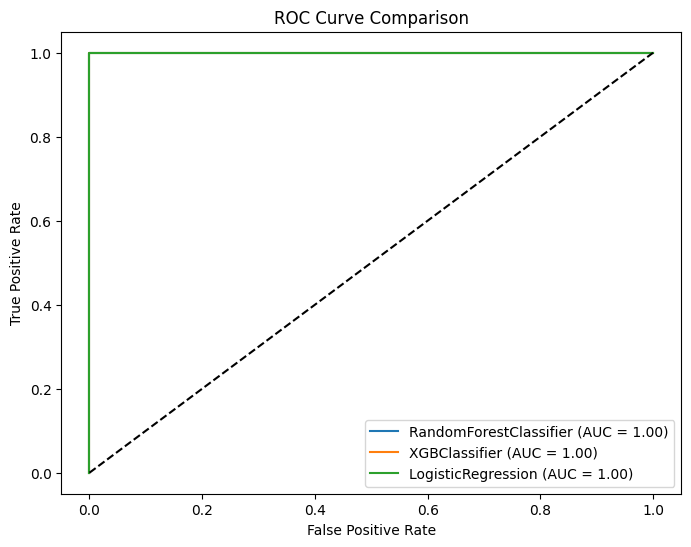

In [ ]:
# ROC-AUC
plt.figure(figsize=(8, 6))
for model in [rf, best_xgb, logit]:
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

TIME SERIES ANALYSIS

In [ ]:
# Building risk map data
risk_map_data = df[[
    'lat', 'long', 'high_risk', 'Sh',
    'infected_Bulinus_density','village','sampling_year'
]].copy()


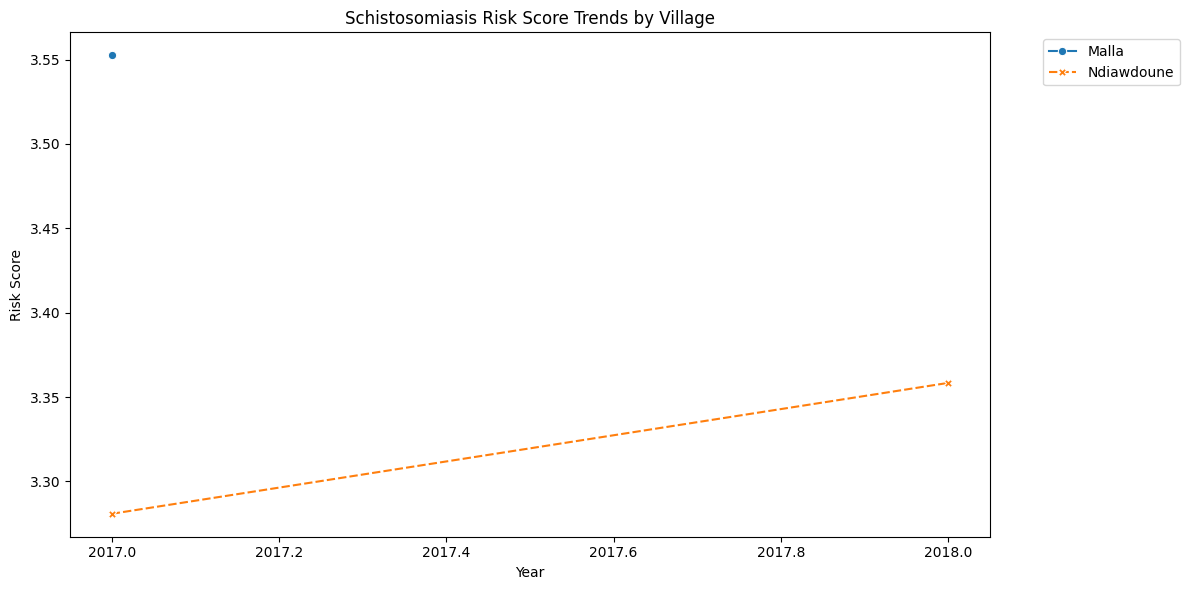

In [ ]:
## Visualing Risk score by year
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=ts_data,
    x='sampling_year',
    y='risk_score',
    hue='village',
    style='village',
    markers=True
)
plt.title('Schistosomiasis Risk Score Trends by Village')
plt.ylabel('Risk Score')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7rp4f8q/np8k19b5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7rp4f8q/xx185aki.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8768', 'data', 'file=/tmp/tmpy7rp4f8q/np8k19b5.json', 'init=/tmp/tmpy7rp4f8q/xx185aki.json', 'output', 'file=/tmp/tmpy7rp4f8q/prophet_modelxjwv7y_2/prophet_model-20250423004019.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:40:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:40:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


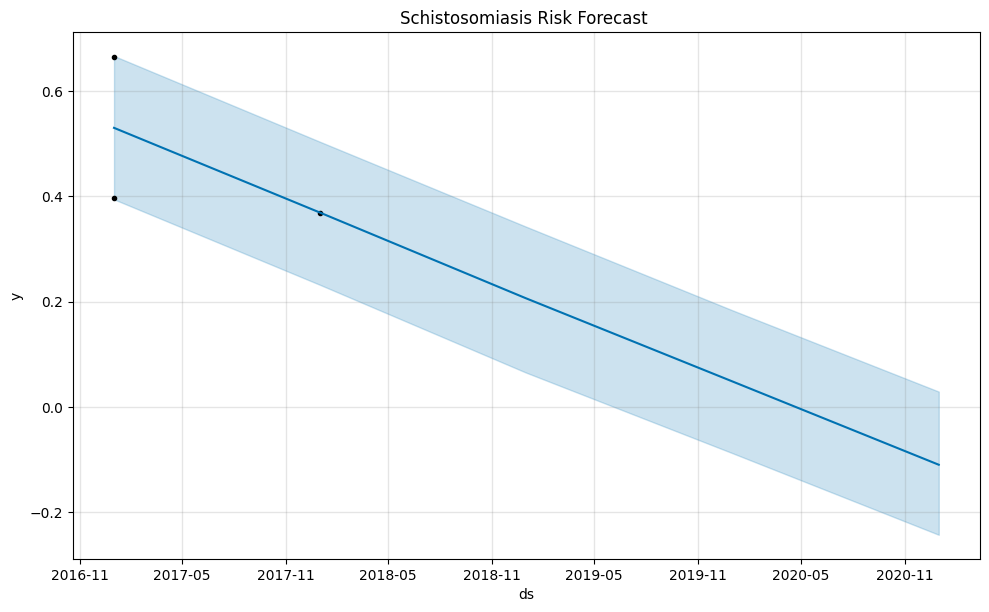

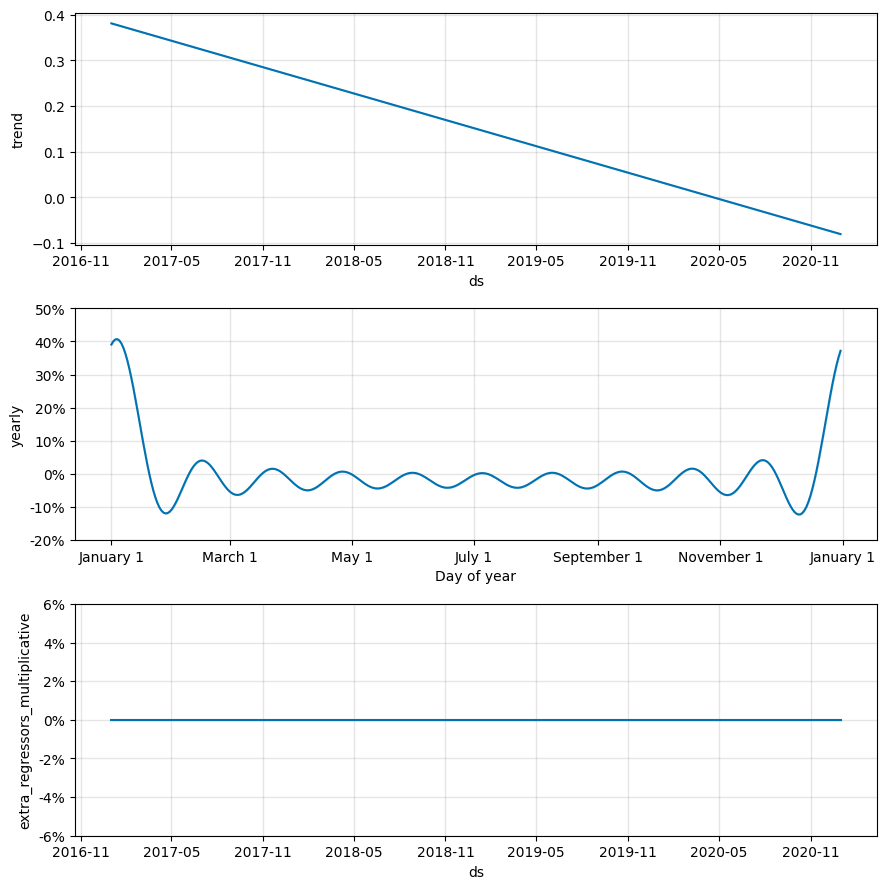

In [ ]:
### Time series analysis using Prophet


def run_prophet_analysis(ts_data, village_name=None):
    """
    Run Prophet time series analysis on schistosomiasis data

    Parameters:
    ts_data (DataFrame): Input data containing time series
    village_name (str): Optional specific village to analyze
    """
    try:
        # 1. Data Preparation
        if village_name:
            df = ts_data[ts_data['village'] == village_name].copy()
        else:
            df = ts_data.copy()

        prophet_data = df[['sampling_year', 'Sh']].copy()
        prophet_data.columns = ['ds', 'y']

        # Add regressor if available
        if 'infected_Bulinus_density' in df.columns:
            prophet_data['infected_Bulinus_density'] = df['infected_Bulinus_density']

        # Convert year to datetime
        prophet_data['ds'] = pd.to_datetime(prophet_data['ds'], format='%Y')

        # Remove rows with missing values
        prophet_data = prophet_data.dropna()

        # 2. Data Validation
        if len(prophet_data) < 2:
            raise ValueError(f"Only {len(prophet_data)} year(s) available. Need ≥2 years.")
        if prophet_data['y'].isnull().any():
            raise ValueError("Target variable contains null values")

        # 3. Model Configuration
        model = Prophet(
            seasonality_mode='multiplicative',
            yearly_seasonality=True,
            weekly_seasonality=False,
            daily_seasonality=False
        )

        # Add regressor if present
        if 'infected_Bulinus_density' in prophet_data.columns:
            model.add_regressor('infected_Bulinus_density')

        # 4. Model Fitting
        model.fit(prophet_data)

        # 5. Forecasting
        future = model.make_future_dataframe(periods=3, freq='Y')

        # Handle regressor for future periods
        if 'infected_Bulinus_density' in prophet_data.columns:
            # Using last known value - consider better methods for real applications
            future['infected_Bulinus_density'] = prophet_data['infected_Bulinus_density'].iloc[-1]

        forecast = model.predict(future)

        # 6. Visualization
        fig1 = model.plot(forecast)
        plt.title(f"Schistosomiasis Risk Forecast {'for ' + village_name if village_name else ''}")

        fig2 = model.plot_components(forecast)

        return model, forecast

    except Exception as e:
        print(f"Analysis failed: {str(e)}")
        return None, None

# Example usage:
# For all villages combined
model, forecast = run_prophet_analysis(ts_data)